# krigingを実装する

In [43]:
import calc_variogram as variogram
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats
import scipy.optimize as opt
import statsmodels.api as sm

In [140]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
# データの用意
data = pd.read_csv('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/house_price_raw.csv')
data['price'] = np.log(data.price)
data = data[['px', 'py', 'price']].values

In [91]:
#バリオグラムの実装
vario = variogram.get_diff(data)

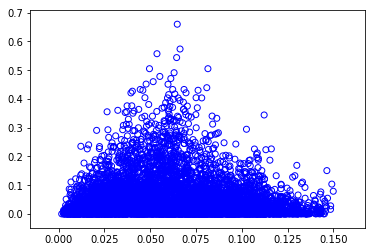

In [92]:
plt.scatter(vario[0], vario[1], facecolors = 'None', edgecolors = 'blue')

In [86]:
var, edge, bins = stats.binned_statistic(vario[0], vario[1], statistic=np.var, bins=14)

In [87]:
e_vario[1]/var

array([2.64599387, 1.67595645, 1.16021965, 0.94070333, 0.68552576,
       0.52221785, 0.40052931, 0.33084309, 0.39275833, 0.41203027,
       0.43594358, 0.35914217, 0.24580344, 0.17975714])

In [88]:
print(e_vario[1])
print(var)

[0.05136555 0.10458075 0.17105515 0.27261545 0.36261042 0.44811348
 0.48357707 0.50817821 0.43388362 0.41330115 0.43334466 0.5444251
 0.54681678 0.38960127]
[0.01941257 0.06240064 0.14743342 0.2897996  0.52895229 0.85809683
 1.20734502 1.53600974 1.10470891 1.00308444 0.99403839 1.51590413
 2.22460992 2.16737575]


[  0.         100.           3.58878582  51.73292058]
liner:366.07149813149624
[1.00000000e+00 1.00000000e+02 4.85879393e+00 3.54841847e+06
 1.01736516e+02]
gaussian:377.75746210494276
[2.00000000e+00 1.00000000e+02 3.58875659e+00 1.10708540e+05
 2.13993602e+03]
exponent:366.07047162480717
[3.00000000e+00 1.00000000e+02 3.58878589e+00 1.69412246e+04
 4.91212112e+02]
spherical:366.07148970818446
[0.         0.0183234  0.0366468  0.0549702  0.0732936  0.09161699
 0.10994039 0.12826379 0.14658719 0.16491059]
3.588756594976747 110708.53983745795 2139.936023769441
[2.00000000e+00 1.00000000e+02 3.58875659e+00 1.10708540e+05
 2.13993602e+03]
[  0.         100.           5.57607248  25.9245934 ]
liner:377.99111748081515
[1.00000000e+00 1.00000000e+02 5.92250328e+00 2.70516512e+06
 1.15438264e+02]
gaussian:385.0679990002596
[2.00000000e+00 1.00000000e+02 5.57609443e+00 3.55195668e+04
 1.37006838e+03]
exponent:377.9908677327878
[3.00000000e+00 1.00000000e+02 5.57607245e+00 1.51851418e+04
 8.786

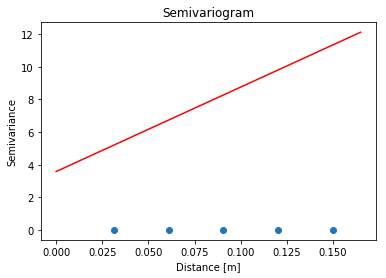

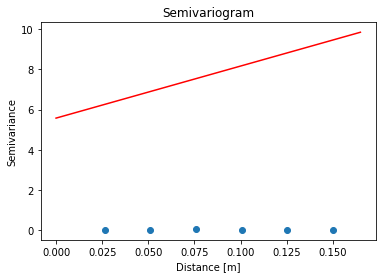

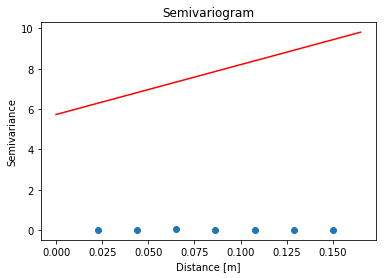

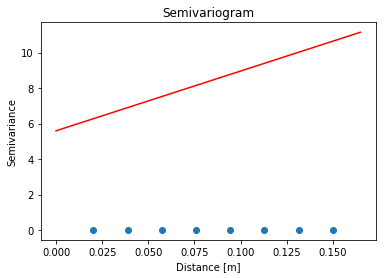

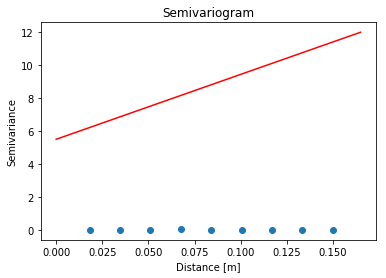

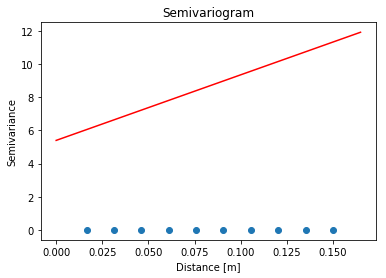

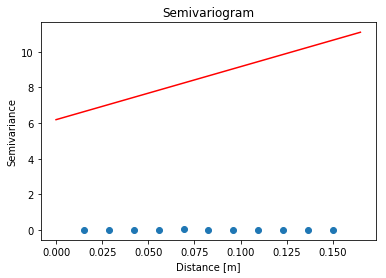

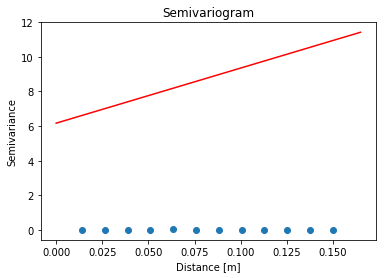

In [94]:
param, lag_num, fig = variogram.auto_vario(vario, var, range(5,13))

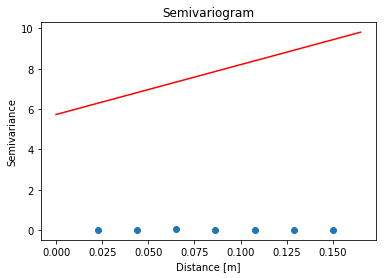

In [95]:
fig # 最小二乗誤差を最小化するbins, model, parameterのバリオグラム

In [15]:
print(param)
print(lag_num)

[ 3.00000000e+00  1.00000000e+02  5.22187166e-02 -1.11840026e+01
  1.00327251e+02]
9


## krigingを実装する
 - 係数パラメータについてはFGLSを使用
     - 一度ols推定したのち, 残差を重み行列に使ってWLSを行う
 - lambdaの推定に関しては要検討

In [97]:
data = pd.read_csv('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/house_price_raw.csv')
data['price'] = np.log(data.price)

In [98]:
data.head()

,px,py,price,station,tokyo
0,139.362310,35.733850,11.938193,0.010620,0.408220
1,139.363027,35.654078,12.055250,0.011653,0.405010
2,139.367082,35.659859,12.287653,0.010110,0.400614
3,139.369003,35.645546,12.061047,0.004172,0.399719
4,139.371526,35.647323,12.013701,0.007247,0.397050


In [99]:
x = data[['station', 'tokyo']]
y = data['price']

In [100]:
step1 = sm.OLS(y, x)
step1_res = step1.fit()

In [101]:
step1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.337e+04
Date:                Wed, 06 Mar 2019   Prob (F-statistic):          1.94e-147
Time:                        10:46:55   Log-Likelihood:                -158.76
No. Observations:                 128   AIC:                             321.5
Df Residuals:                     126   BIC:                             327.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
station       53.2124     18.775      2.834      0.005      16.057      90.368
tokyo         33.2437      0.480     69.221      0.000      32.293      34.194
==============================================================================
Omnibus:                        5.919   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.152
Skew:                          -0.408   Prob(JB):                       0.0761
Kurtosis:                       2.452   Cond. No.                         89.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

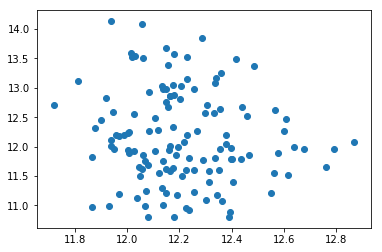

In [102]:
plt.scatter(y, step1_res.fittedvalues)

In [103]:
resid = step1_res.resid

In [104]:
w = np.sqrt(resid**2)

In [105]:
res_fwls = sm.WLS(y, x, 1./w).fit()

In [106]:
res_fwls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.343e+04
Date:                Wed, 06 Mar 2019   Prob (F-statistic):          1.96e-197
Time:                        10:46:56   Log-Likelihood:                -114.25
No. Observations:                 128   AIC:                             232.5
Df Residuals:                     126   BIC:                             238.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
station       58.1434     10.551      5.511      0.000      37.264      79.023
tokyo         33.1583      0.267    124.389      0.000      32.631      33.686
==============================================================================
Omnibus:                      518.807   Durbin-Watson:                   0.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.315
Skew:                          -0.243   Prob(JB):                      0.00128
Kurtosis:                       1.497   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
resid = res_fwls.resid

一応係数パラメータの推定はできた?  
できれば残差の分散共分散関数を使いたいが、非負正定値の問題をクリアしないといけない

### lambda(空間相関の補正項)の実装

 - 残差から理論バリオグラムを求める
 - →理論バリオグラムのパラメータを用いて共分散関数を作成する

In [108]:
resid = pd.DataFrame(resid, columns=['residuals'])
resid = data[['px', 'py']].join(resid)
resid = resid.values

In [117]:
vario = variogram.get_diff(resid)

In [118]:
vario[0]

array([0.07977522, 0.07414472, 0.08855728, ..., 0.00499936, 0.01262236,
       0.00762327])

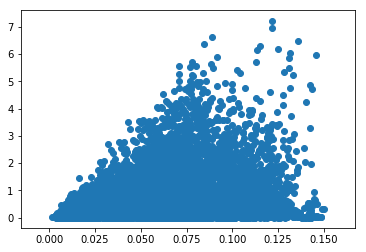

In [111]:
plt.scatter(vario[0], vario[1])

In [114]:
e_vario, var = variogram.emp_variogram(vario, 14)

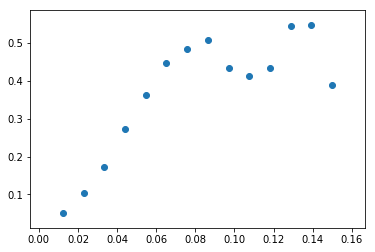

In [115]:
plt.scatter(e_vario[0], e_vario[1])

[  0.         100.           0.26533225   5.82049961]
liner:0.44028568749296615
[1.00000000e+00 1.00000000e+02 1.03251133e-17 9.52948811e-01
 4.56000588e-02]
[2.00000000e+00 1.00000000e+02 1.57348541e-17 1.09655540e+00
 5.73268317e-02]
[3.00000000e+00 1.00000000e+02 1.10047987e-20 9.44323919e-01
 9.87975859e-02]
[0.         0.0183234  0.0366468  0.0549702  0.0732936  0.09161699
 0.10994039 0.12826379 0.14658719 0.16491059]
[0.         0.0183234  0.0366468  0.0549702  0.0732936  0.09161699
 0.10994039 0.12826379 0.14658719 0.16491059] 0.9529488110496221 0.04560005880422381
[1.00000000e+00 1.00000000e+02 1.03251133e-17 9.52948811e-01
 4.56000588e-02]
[  0.         100.           0.2669083    5.80467163]
liner:0.4654550307910472
[1.00000000e+00 1.00000000e+02 2.43184740e-19 9.50595859e-01
 4.52383222e-02]
[2.00000000e+00 1.00000000e+02 1.46615192e-18 1.08929605e+00
 5.63394187e-02]
[3.00000000e+00 1.00000000e+02 1.94360419e-19 9.42039013e-01
 9.79834455e-02]
[0.         0.0183234  0.03664

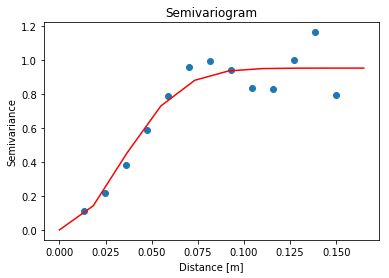

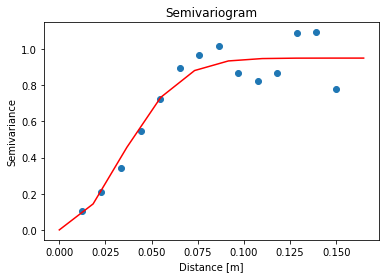

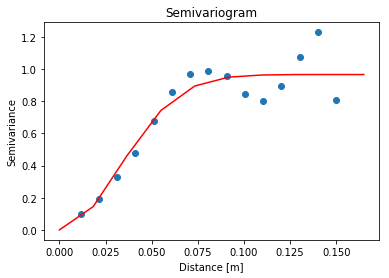

In [175]:
param, lag, fig = variogram.auto_vario(vario, range(13,16))

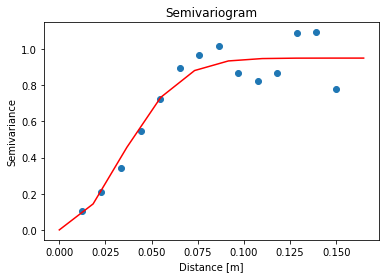

In [176]:
fig

In [177]:
print(param)

[1.00000000e+00 1.00000000e+02 2.43184740e-19 9.50595859e-01
 4.52383222e-02]


In [178]:
def transform_param(param):
    param2 = None
    if param[0] == 1:
        param2 = np.array([param[0], param[2], param[3], param[4]]) # モデル型, ナゲット=ノイズ, 空間相関分散, レンジパラメータ
    return param2

In [179]:
param2 = transform_param(param) #そもそもfittedrangeが必要ない

In [180]:
param2[1:]

array([2.43184740e-19, 9.50595859e-01, 4.52383222e-02])

In [181]:
variogram.gaussian_model(0, param2[1], param2[2], param2[3])

2.4318473990033065e-19

In [182]:
def covario_gaussian(x, sigma, tau, r):
    cond = [x <= 0, x > 0]
    func = [lambda x: sigma + tau, lambda x: tau * np.exp(-x**2 / r)]
    return np.piecewise(x, cond, func)

In [166]:
data.head()

,px,py,price,station,tokyo
0,139.362310,35.733850,11.938193,0.010620,0.408220
1,139.363027,35.654078,12.055250,0.011653,0.405010
2,139.367082,35.659859,12.287653,0.010110,0.400614
3,139.369003,35.645546,12.061047,0.004172,0.399719
4,139.371526,35.647323,12.013701,0.007247,0.397050


In [183]:
points = data[['px', 'py']].values
distance = scipy.spatial.distance.pdist(points)
distance =scipy.spatial.distance.squareform(distance)

In [184]:
distance

array([[0.        , 0.07977522, 0.07414472, ..., 0.1456904 , 0.14342874,
        0.14034726],
       [0.07977522, 0.        , 0.00706137, ..., 0.10275067, 0.10323014,
        0.10451886],
       [0.07414472, 0.00706137, 0.        , ..., 0.10051429, 0.10066822,
        0.10147933],
       ...,
       [0.1456904 , 0.10275067, 0.10051429, ..., 0.        , 0.00499936,
        0.01262236],
       [0.14342874, 0.10323014, 0.10066822, ..., 0.00499936, 0.        ,
        0.00762327],
       [0.14034726, 0.10451886, 0.10147933, ..., 0.01262236, 0.00762327,
        0.        ]])

In [186]:
param2[1] + param2[2]

0.9505958590150981

In [194]:
covario_gaussian(np.linspace(0,1,10), param2[1], param2[2], param2[3])

array([9.50595859e-01, 7.23561752e-01, 3.19091071e-01, 8.15291789e-02,
       1.20689879e-02, 1.03511357e-03, 5.14356840e-05, 1.48081363e-06,
       2.46999261e-08, 2.38698819e-10])

In [189]:
calc_covariance = np.frompyfunc(covario_gaussian, 4, 1)

In [195]:
sigma_large = calc_covariance(distance, param2[1], param2[2], param2[3])

In [196]:
pd.DataFrame(sigma_large)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.9505958590150981,0.8258473221002524,0.841820878572208,0.7992963067881168,0.8040906163444944,0.9471196818616722,0.8736219462823676,0.8227552072269061,0.8472721320703694,0.8608399002057885,...,0.6721849778351575,0.6316917559652603,0.6857427732874166,0.6607305600680764,0.6491630106646112,0.6516934795746232,0.6066776399395583,0.5946017580011487,0.6032587352611898,0.6150330600680797
1,0.8258473221002524,0.9505958590150981,0.9495486620207946,0.9483185139188002,0.9481224189722236,0.8414804951039218,0.9402114535948547,0.9477411136151151,0.9455171795604154,0.9418567060194014,...,0.7994378127096078,0.7903714617537542,0.7976403293492694,0.7891595002837464,0.7840407973183837,0.7752501244156684,0.7607282582068718,0.7527321224065443,0.7510906201943166,0.7466586295261182
2,0.841820878572208,0.9495486620207946,0.9505958590150981,0.9462236235379446,0.9468858969924276,0.8581154971657576,0.9457155202880857,0.9486530111667281,0.9487958708990255,0.9467553821567145,...,0.8095141763625638,0.7974504271935493,0.8091358276405659,0.7993167061859714,0.7936657747047361,0.7860869054532442,0.7686979165340468,0.7603340886671698,0.7598137904296521,0.7570648882426665
3,0.7992963067881168,0.9483185139188002,0.9462236235379446,0.9505958590150981,0.9503957672260184,0.8187811483502274,0.9340095042541248,0.9484266202420288,0.9432704640542456,0.9380299284957502,...,0.81891957307802,0.8141153751432088,0.8153416191395834,0.8094217371152144,0.8053872059592471,0.7957305495116753,0.7856385934334447,0.7785295926246408,0.7757770176910759,0.7696325108383737
4,0.8040906163444944,0.9481224189722236,0.9468858969924276,0.9503957672260184,0.9505958590150981,0.8243216036749798,0.9364119864506315,0.9494570781909987,0.9450804842905605,0.9404144632174378,...,0.8262855454223828,0.8205445297817687,0.8231708557098765,0.8169133525262635,0.8127505447605373,0.803565605008324,0.7926189238630043,0.7854342392184361,0.7830891415556399,0.777546835243714
5,0.9471196818616722,0.8414804951039218,0.8581154971657576,0.8187811483502274,0.8243216036749798,0.9505958590150981,0.8904851314973402,0.8432329508737414,0.8666799572685979,0.8798988079598699,...,0.7172750970204718,0.6768759781152058,0.7308135591699729,0.7063859144913895,0.6950449196844934,0.6980300659803916,0.6531378603273142,0.6411716205999145,0.6501774369640357,0.6623940092951772
6,0.8736219462823676,0.9402114535948547,0.9457155202880857,0.9340095042541248,0.9364119864506315,0.8904851314973402,0.9505958590150981,0.942824168670734,0.9483430939130088,0.9499524903206744,...,0.8206519359798602,0.801669861020966,0.823590473165993,0.8105766200906662,0.8036636295366513,0.7988591184891525,0.7748179111742831,0.7656037215739544,0.7676260086440684,0.768742370835312
7,0.8227552072269061,0.9477411136151151,0.9486530111667281,0.9484266202420288,0.9494570781909987,0.8432329508737414,0.942824168670734,0.9505958590150981,0.9488686782294687,0.9459587873348492,...,0.8341171567303347,0.8248704533631064,0.8326266020388214,0.8247339645570932,0.8199110087671052,0.812041006929792,0.7976939770467844,0.7900322621214678,0.7889478911191709,0.7853005015245145
8,0.8472721320703694,0.9455171795604154,0.9487958708990255,0.9432704640542456,0.9450804842905605,0.8666799572685979,0.9483430939130088,0.9488686782294687,0.9505958590150981,0.9498777388456382,...,0.8329532982090897,0.8190337239920051,0.833594200688918,0.8233250038465667,0.8175330295076287,0.8112095639271402,0.7922372439276313,0.7838561154513644,0.7843179154996263,0.7830248736454247
9,0.8608399002057885,0.9418567060194014,0.9467553821567145,0.9380299284957502,0.9404144632174378,0.8798988079598699,0.9499524903206744,0.9459587873348492,0.9498777388456382,0.9505958590150981,...,0.8332142288348843,0.8163904022144541,0.8352201906545385,0.823527485425261,0.8171651322517225,0.8119027328102106,0.790092610966602,0.7813099452184038,0.7827800236630069,0.7830281098249591


In [199]:
np.linalg.inv(sigma_large.astype(float))

array([[-2.21422755e+11,  9.22420004e+11,  2.27388183e+11, ...,
         1.96911905e+12,  3.12799104e+12,  1.87854523e+12],
       [-1.24392297e+12,  1.14901168e+14, -2.11725935e+14, ...,
        -7.06765694e+13,  2.39925310e+13, -1.83005384e+13],
       [-5.33755656e+12, -2.53387607e+14,  4.72462876e+14, ...,
         2.33724520e+14, -9.33349986e+13,  7.35699993e+13],
       ...,
       [-6.60198226e+12,  2.56460038e+13, -4.18451735e+13, ...,
        -2.51177479e+13,  5.82786660e+13, -3.59412559e+13],
       [-1.16167721e+13, -6.47282749e+13,  1.08634684e+14, ...,
         1.10210672e+14, -6.69394908e+13,  5.04274273e+13],
       [-1.58903474e+12,  2.83148906e+13, -4.18628541e+13, ...,
         1.36555813e+13,  1.37321509e+13,  1.56142131e+12]])

予測地点(m個)と観測地点(n個)の距離行列を作り, それに共分散関数を適用して補正項cを作成する